# Trabajo grupal
## Polinomios de Chebyshev y procesamiento de imágenes en Jupyter Notebooks
### Autores: 
* AVILÉS CAHILL, ADÁN 
* BAILAZ PASCUA, ENRIQUE
* CABRERA SÁNCHEZ, MONSERRAT
* DIZ-LOIS PALOMARES, FERNANDO

## Presentación del problema. 
Se procede a realizar ajustes e interpolaciones en Python utilizando *NumPy* y los módulos *interpolate* y optimize de *SciPy*. Estas funciones son
* La función seno, f(x) = $\sin$(x), con la cual trabajaremos entre (-$\pi$, $\pi$). 
  
* La función de Runge, conocida por su alta oscilación en las aproximaciones polinomiales, y con ecuación r(x) = $\dfrac{1}{1+25x^2}$. Tomaremos el abierto (-1,1) para este caso.
  
* La función Gaussiana f(x) = $\mathcal{a}\exp(-\dfrac{(x-\mathcal{b})^2}{2\mathcal{c}^2})$, con parámetros $\mathcal{a}=1$, $\mathcal{b}=0$ y $\mathcal{c}=\sqrt{\dfrac{1}{40}}$, dando lugar a g(x) = $e^{(-20x^2)}$, que estudiaremos también entre (-1, 1).
#### Procedimiento
Hemos decidido dividir el trabajo en tres archivos. El notebook con los resultados, un archivo .py con las contantes (los nodos) y otro archivo .py con las funciones. De esta manera evitamos sobrecargar el notebook final. 

In [134]:
# Importo mis propias funciones forzando a que se renueven en cada carga 
# ==============================================================================
import constantes as const
import funciones_auxiliares as F
# Con autoreload forzamos que con cada cambio en los .py, se cargue de forma automática. 
%load_ext autoreload
%autoreload 2
# Importamos los paquetes a utilizar
# ==============================================================================
import numpy as np
import scipy as sp
from math import pi
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import  pprint
# Para tener el estilo correcto
from matplotlib import style
style.use('default')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tarea 1-Interpolación polinómica: Interpolación baricéntrica
Hemos definido una función llamada **inter_bar** que nos permite hacer la interpolación baricéntrica.

In [135]:
help(F.inter_bar)

Help on function inter_bar in module funciones_auxiliares:

inter_bar(nodos, funcion, intervalo)
    Esta función hace la interpolación baricéntrica, crea su plot y calcula el error y tiempo
    que se tarda en hacer la interpolación. 
    
    Args:
        nodos : Lista de nodos para interpolar 
        funcion :  Funcion que se quiere interpolar.
        intervalo : Lista de puntos donde se evaluará el polinomio baricentrico tras ser calculado
        
    Returns:
        pol: Devuelve el valor de los puntos del intervalo evaluados con el polinomio interpolador.
             Recordemos que barycentric_interpolate no nos devuelve los coeficientes del polinomio, 
             sino que evalua el polinomio en el intervalo que le damos.
        fig: Devuelve el plot.
        tiempo_ejecucion: Tiempo que tarda en ejecutarse la interpolacion
        error: Error de la interpolacion respecto al intervalo original.



La interpolación baricéntrica para el seno, con once nodos equespaciados tiene un tiempo de ejecución de 
0.00025890000051731477 segundos y un error de 0.0001526446543527766 aproximadamente.
Su plot es: 


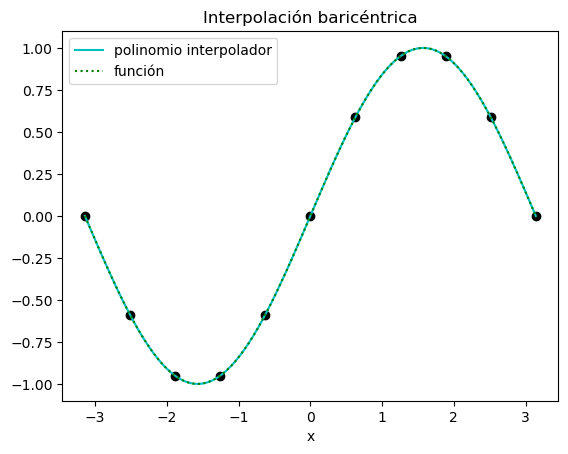

In [136]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función seno
coefs_pol, fig_sin_11, tiempo_ejecucion_sin_11, error_sin_11 = F.inter_bar(const.nodos_sin_11,
                                                                            F.sin_vec,
                                                                            const.abscisas_sin)
print('La interpolación baricéntrica para el seno, con once nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_sin_11) +' y un error de ' + str(error_sin_11) + ' aproximadamente.\nSu plot es: ')
fig_sin_11

La interpolación baricéntrica para el seno, con veintiun nodos equespaciados tiene un tiempo de ejecución de 
0.00031550000039715087 segundos y un error de 2.209540354780998e-12 aproximadamente. 
Su plot es: 


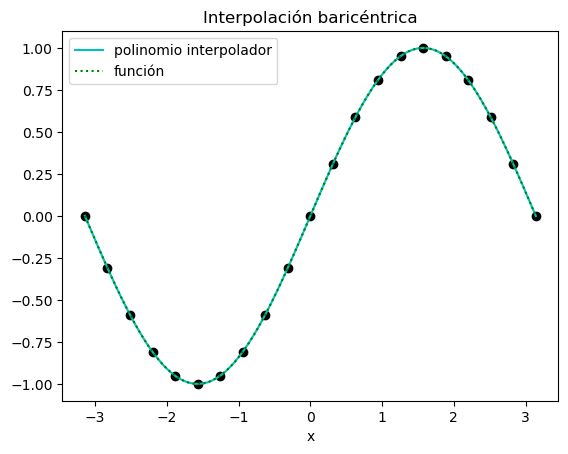

In [137]:
# Polinomio interpolador que se obtiene con 21 nodos equiespaciados en la función seno
coefs_pol, fig_sin_21, tiempo_ejecucion_sin_21, error_sin_21 = F.inter_bar(const.nodos_sin_21,
                                                                            F.sin_vec,
                                                                            const.abscisas_sin)
print('La interpolación baricéntrica para el seno, con veintiun nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_sin_21) +' y un error de ' + str(error_sin_21) + ' aproximadamente. \nSu plot es: ')
fig_sin_21

La interpolación baricéntrica para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de 
0.0002688000004127389 segundos y un error de 4.2237042627343925e-05 aproximadamente. 
Su plot es: 


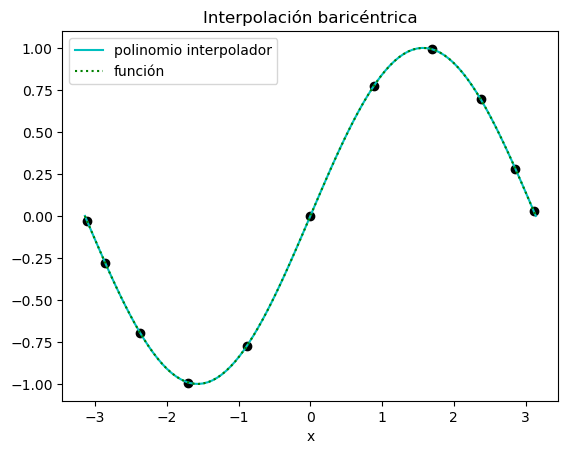

In [138]:
# Polinomio interpolador que se obtiene con 11 nodos de Chebyshev en la función seno
coefs_pol, fig_cheby_sin__11, tiempo_ejecucion_cheby_sin_11, error_cheby_sin_11 = F.inter_bar(const.nodos_cheby_sin_11,
                                                                                            F.sin_vec,
                                                                                            const.abscisas_sin)
print('La interpolación baricéntrica para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_sin_11) +' y un error de ' + str(error_cheby_sin_11) + ' aproximadamente. \nSu plot es: ')
fig_cheby_sin__11

La interpolación baricéntrica para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de 
0.00035489999936544336 segundos y un error de 3.720645483947632e-15 aproximadamente. 
Su plot es: 


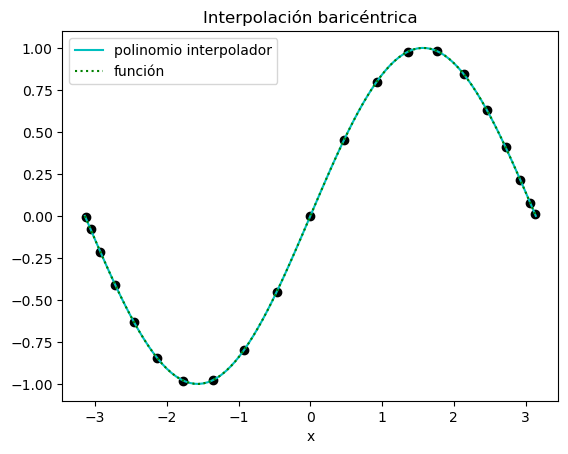

In [139]:
# Polinomio interpolador que se obtiene con 21 nodos de Chebysheven la función seno
_, fig_cheby_sin__21, tiempo_ejecucion_cheby_sin_21, error_cheby_sin_21 = F.inter_bar(const.nodos_cheby_sin_21,
                                                                                            F.sin_vec,
                                                                                            const.abscisas_sin)
print('La interpolación baricéntrica para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_sin_21) +' y un error de ' + str(error_cheby_sin_21) + ' aproximadamente. \nSu plot es: ')
fig_cheby_sin__21

Los resultados que se han obtenido al aproximar la función seno mediante la interpolación baricéntrica son muy similares en todos los casos, pues aproximan de forma casi perfecta la función seno en el intervalo [-$\pi,\pi$]. Sin embargo, hay que destacar dado el error obtenido que en el caso de 11 nodos el error cometido es mayor que con 21 nodos. \
Ademas, el error que se comete con los nodos equiespaciados es mayor que el que se produce con los nodos de Chebyshev. \
Veamos que ocurre ahora con la función de Runge

La interpolación baricéntrica para la función de Runge, con once nodos equespaciados tiene un tiempo de ejecución de 
0.00030650000007881317 segundos y un error de 5.772723863676266 aproximadamente.
Su plot es: 


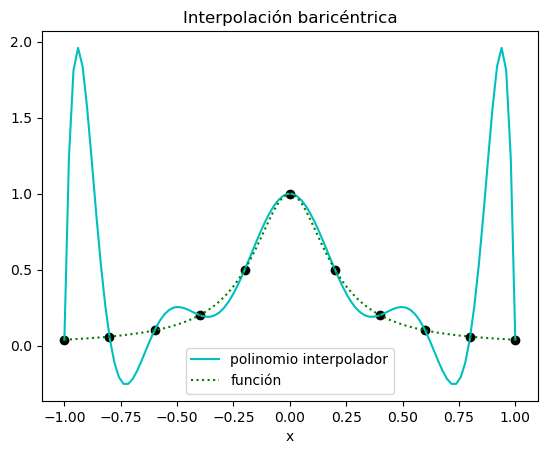

In [140]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función de runge
_, fig_runge_11, tiempo_ejecucion_runge_11, error_runge_11 = F.inter_bar(const.nodos_runge_11,
                                                                         F.runge_vec,
                                                                         const.abscisas_runge)
print('La interpolación baricéntrica para la función de Runge, con once nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_runge_11) +' y un error de ' + str(error_runge_11) + ' aproximadamente.\nSu plot es: ')
fig_runge_11

La interpolación baricéntrica para la función de Runge, con veintiun nodos equespaciados tiene un tiempo de ejecución de 
0.0003827999998975429 segundos y un error de 117.34002424597166 aproximadamente.
Su plot es: 


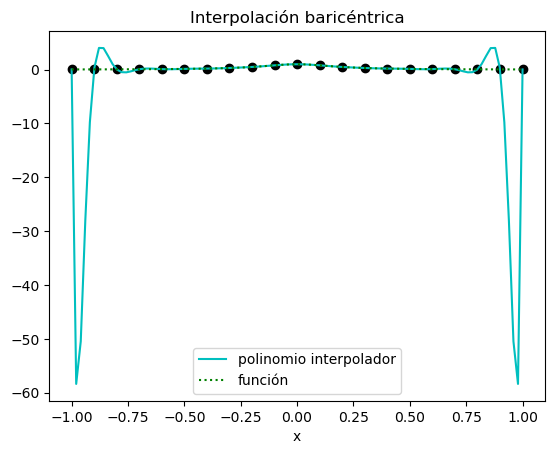

In [141]:

# Polinomio interpolador que se obtiene con 21 nodos equiespaciados en la función de runge
_, fig_runge_21, tiempo_ejecucion_runge_21, error_runge_21 = F.inter_bar(const.nodos_runge_21,
                                                                         F.runge_vec,
                                                                         const.abscisas_runge)
print('La interpolación baricéntrica para la función de Runge, con veintiun nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_runge_21) +' y un error de ' + str(error_runge_21) + ' aproximadamente.\nSu plot es: ')
fig_runge_21

La interpolación baricéntrica para la función de Runge, con once nodos de Chebysev tiene un tiempo de ejecución de 
0.0002761999994618236 segundos y un error de 0.5684435206780184 aproximadamente.
Su plot es: 


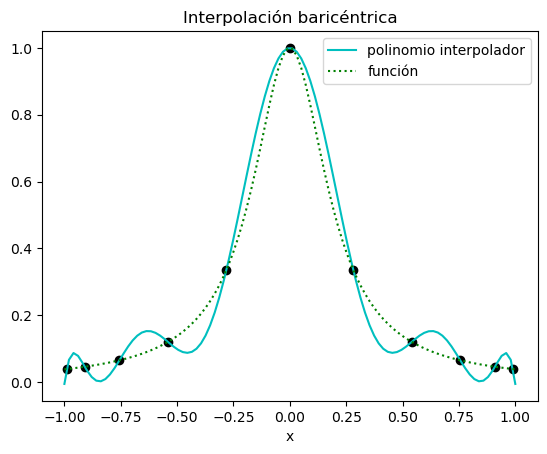

In [142]:

# Polinomio interpolador que se obtiene con 11 nodos de Chebysev en la función de runge
_, fig_cheby_runge_11, tiempo_ejecucion_cheby_runge_11, error_cheby_runge_11 = F.inter_bar(const.nodos_cheby_runge_11,
                                                                                           F.runge_vec,
                                                                                           const.abscisas_runge)
print('La interpolación baricéntrica para la función de Runge, con once nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_runge_11) +' y un error de ' + str(error_cheby_runge_11) + ' aproximadamente.\nSu plot es: ')
fig_cheby_runge_11


La interpolación baricéntrica para el seno, con once veintiun nodos de Chebysev tiene un tiempo de ejecución de 
0.0003544000001056702 segundos y un error de 0.074962274372034 aproximadamente.
Su plot es: 


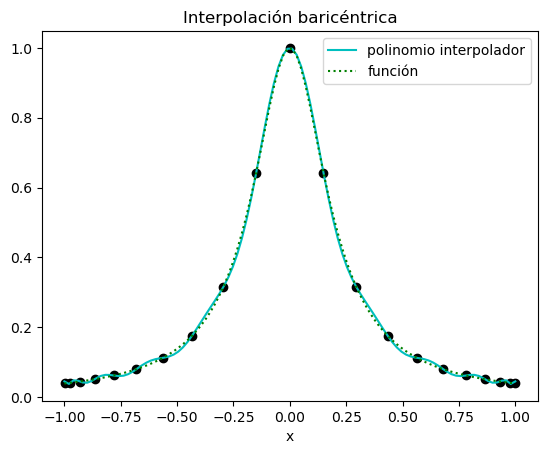

In [143]:
# Polinomio interpolador que se obtiene con 21 nodos de Chebysev en la función de runge
_, fig_cheby_runge_21, tiempo_ejecucion_cheby_runge_21, error_cheby_runge_21 = F.inter_bar(const.nodos_cheby_runge_21,
                                                                                           F.runge_vec,
                                                                                           const.abscisas_runge)
print('La interpolación baricéntrica para el seno, con once veintiun nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_runge_21) +' y un error de ' + str(error_cheby_runge_21) + ' aproximadamente.\nSu plot es: ')
fig_cheby_runge_21

A diferencia del caso anterior al aproximar la función Runge en el intervalo [-1, 1] se obtienen resultados muy opuestos. De forma que, en el caso de nodos equiespaciados a medida que se toman más nodos se va empeorando la aproximación del polinomio interpolador, lo que queda reflejado en el error absoluto cometido y en la gráfica cuyo recorrido en la función Runge es [0, 1] y en el polinomio interpolado con 21 nodos equiespaciados es [-60,4.04).\
 Por el contrario, al tomar nodos de Chebyshev el error que se comete es menor que en el caso de los nodos equiespaciados, destancándose el hecho de que el polinomio interpolador en el caso de 21 nodos aproxima mejor la función Runge.

La interpolación baricéntrica para la función de Gauss, con once nodos equespaciados tiene un tiempo de ejecución de 
0.0002666000000317581 segundos y un error de 4.840969915788538 aproximadamente.
Su plot es: 


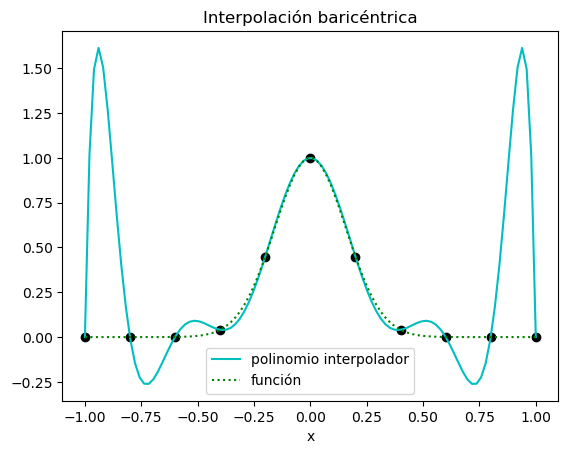

In [144]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función exponencial
_, fig_exp_11, tiempo_ejecucion_exp_11, error_exp_11 = F.inter_bar(const.nodos_gauss_11,
                                                                         F.exp_vec,
                                                                         const.abscisas_gauss)
print('La interpolación baricéntrica para la función de Gauss, con once nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_exp_11) +' y un error de ' + str(error_exp_11) + ' aproximadamente.\nSu plot es: ')
fig_exp_11

La interpolación baricéntrica para la función de Gauss, con veitiun nodos equespaciados tiene un tiempo de ejecución de 
0.0003065999999307678 segundos y un error de 3.845940134241625 aproximadamente.
Su plot es: 


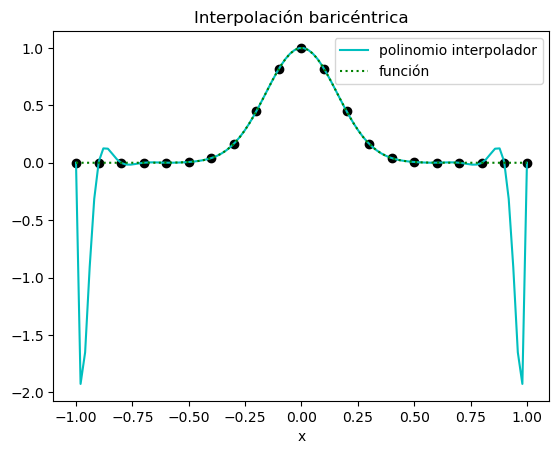

In [145]:
# Polinomio interpolador que se obtiene con 21 nodos equiespaciados en la función exponencial
_, fig_exp_21, tiempo_ejecucion_exp_21, error_exp_21 = F.inter_bar(const.nodos_gauss_21,
                                                                         F.exp_vec,
                                                                         const.abscisas_gauss)
print('La interpolación baricéntrica para la función de Gauss, con veitiun nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_exp_21) +' y un error de ' + str(error_exp_21) + ' aproximadamente.\nSu plot es: ')
fig_exp_21

La interpolación baricéntrica para la función de Gauss, con once nodos de Chebysev tiene un tiempo de ejecución de 
0.00023120000059861923 segundos y un error de 0.5045441585209862 aproximadamente.
Su plot es: 


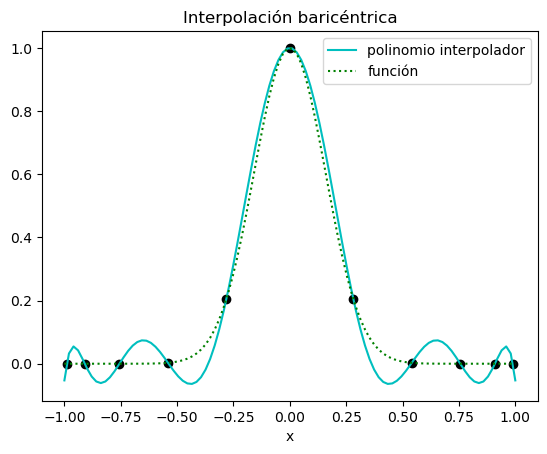

In [146]:
# Polinomio interpolador que se obtiene con 11 nodos de Chebysev en la función exponencial
_, fig_cheby_exp_11, tiempo_ejecucion_cheby_exp_11, error_cheby_exp_11 = F.inter_bar(const.nodos_cheby_gauss_11,
                                                                         F.exp_vec,
                                                                         const.abscisas_gauss)
print('La interpolación baricéntrica para la función de Gauss, con once nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_exp_11) +' y un error de ' + str(error_cheby_exp_11) + ' aproximadamente.\nSu plot es: ')
fig_cheby_exp_11

La interpolación baricéntrica para la función de Gauss, con veitiun nodos de Chebysev tiene un tiempo de ejecución de 
0.00037929999962216243 segundos y un error de 0.008258013260122958 aproximadamente.
Su plot es: 


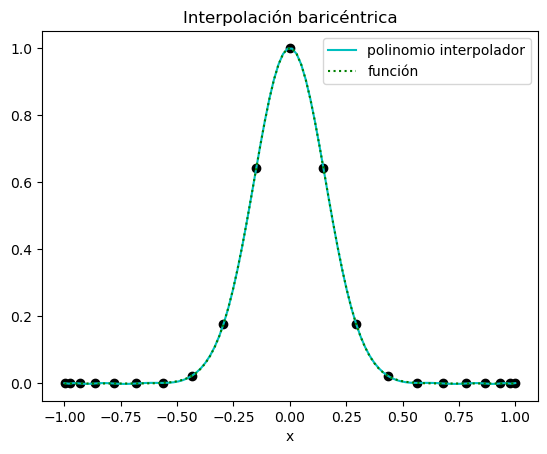

In [147]:
# Polinomio interpolador que se obtiene con 21 nodos de Chebysev en la función exponencial
_, fig_cheby_exp_21, tiempo_ejecucion_cheby_exp_21, error_cheby_exp_21 = F.inter_bar(const.nodos_cheby_gauss_21,
                                                                         F.exp_vec,
                                                                         const.abscisas_gauss)
print('La interpolación baricéntrica para la función de Gauss, con veitiun nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_exp_21) +' y un error de ' + str(error_cheby_exp_21) + ' aproximadamente.\nSu plot es: ')
fig_cheby_exp_21

En último caso, al aproximar la función exponencial en el intervalo [-1, 1] Ocurre algo similar al caso anterior, pero lo errores producidos no son tan grandes. De modo que, con los nodos equiespaciados se aproxima peor que con los nodos de Chevyshev, especialmente al aumentar el número de nodos.\
A diferencia de los nodos de Chevyshev que al aumentar en número el polinomio de interpolación baricéntrica comete un error menor. Además, se debe señalar que el tiempo de ejecución de la interpolación baricéntrica es muy pequeño en todos los casos estudiados.

# Tarea 1-Interpolación polinómica: Interpolación de Lagrange
Hemos definido una función llamada **inter_lagrange** que nos permite hacer la interpolación baricéntrica.

In [148]:
help(F.inter_lagrange)

Help on function inter_lagrange in module funciones_auxiliares:

inter_lagrange(nodos, funcion, intervalo)
    Esta función hace la interpolación baricéntrica, crea su plot y calcula el error y tiempo
    que se tarda en hacer la interpolación. 
    
    Args:
        nodos : Lista de nodos para interpolar 
        funcion :  Funcion que se quiere interpolar.
        intervalo : Lista de puntos donde se evaluará el polinomio para calcular el error
        
    Returns:
        pol: Devuelve el polinomio
        fig: Devuelve el plot.
        tiempo_ejecucion: Tiempo que tarda en ejecutarse la interpolacion
        error: Error de la interpolacion respecto al intervalo original.



La interpolación de Lagrange para el seno, con once nodos equespaciados tiene un tiempo de ejecución de 
0.004762200000186567 segundos y un error de 0.0001526446513683159 aproximadamente.
Su plot es: 


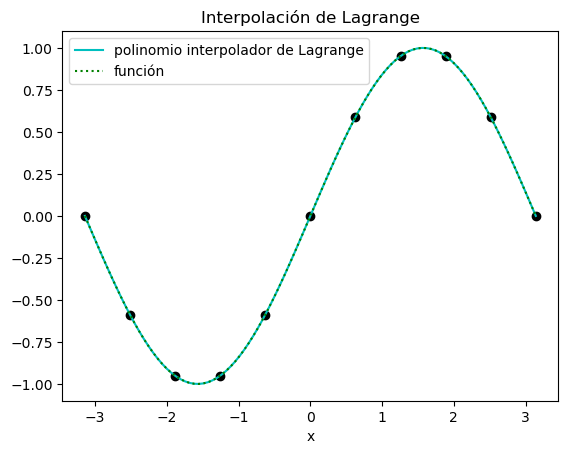

In [149]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función seno
pol, fig_sin_11, tiempo_ejecucion_sin_11, error_sin_11 = F.inter_lagrange(const.nodos_sin_11,
                                                                            F.sin_vec,
                                                                            const.abscisas_sin)
print('La interpolación de Lagrange para el seno, con once nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_sin_11) +' y un error de ' + str(error_sin_11) + ' aproximadamente.\nSu plot es: ')
fig_sin_11


La interpolación de Lagrange para el seno, con veintiun nodos equespaciados tiene un tiempo de ejecución de 
0.01569740000013553 segundos y un error de 2.2618219796782785e-06 aproximadamente. 
Su plot es: 


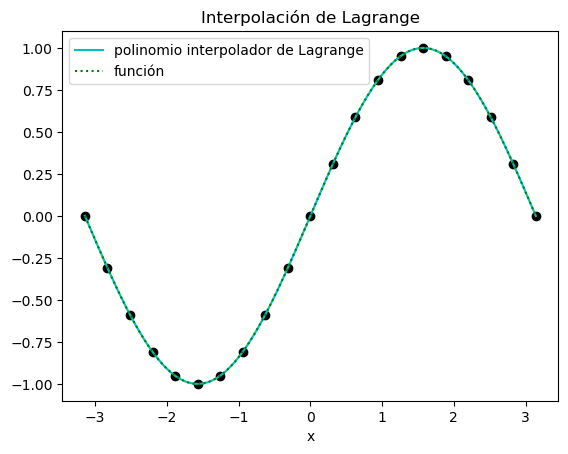

In [150]:
# Polinomio interpolador que se obtiene con 21 nodos equiespaciados en la función seno
coefs_pol, fig_sin_21, tiempo_ejecucion_sin_21, error_sin_21 = F.inter_lagrange(const.nodos_sin_21,
                                                                            F.sin_vec,
                                                                            const.abscisas_sin)
print('La interpolación de Lagrange para el seno, con veintiun nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_sin_21) +' y un error de ' + str(error_sin_21) + ' aproximadamente. \nSu plot es: ')
fig_sin_21

La interpolación de Lagrange para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de 
0.0044679000002361136 segundos y un error de 4.223704263571115e-05 aproximadamente. 
Su plot es: 


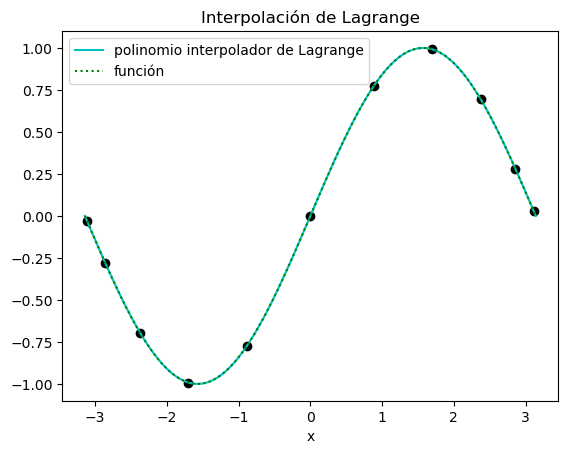

In [151]:
# Polinomio interpolador que se obtiene con 11 nodos de Chebyshev en la función seno
coefs_pol, fig_cheby_sin__11, tiempo_ejecucion_cheby_sin_11, error_cheby_sin_11 = F.inter_lagrange(const.nodos_cheby_sin_11,
                                                                                            F.sin_vec,
                                                                                            const.abscisas_sin)
print('La interpolación de Lagrange para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_sin_11) +' y un error de ' + str(error_cheby_sin_11) + ' aproximadamente. \nSu plot es: ')
fig_cheby_sin__11

La interpolación de Lagrange para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de 
0.00475060000007943 segundos y un error de 4.223704263571115e-05 aproximadamente. 
Su plot es: 


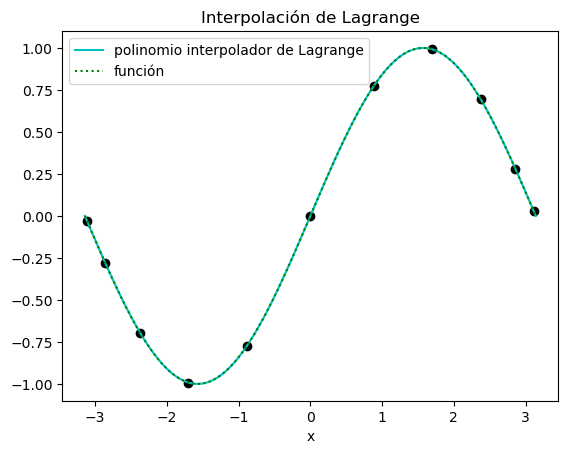

In [152]:
# Polinomio interpolador que se obtiene con 21 nodos de Chebyshev en la función seno
coefs_pol, fig_cheby_sin__11, tiempo_ejecucion_cheby_sin_11, error_cheby_sin_11 = F.inter_lagrange(const.nodos_cheby_sin_11,
                                                                                            F.sin_vec,
                                                                                            const.abscisas_sin)
print('La interpolación de Lagrange para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_sin_11) +' y un error de ' + str(error_cheby_sin_11) + ' aproximadamente. \nSu plot es: ')
fig_cheby_sin__11

El ajuste para funcion seno es muy bueno y los errores muy pequeños tanto para grado 11 como para grado 21 nodos.

La interpolación baricéntrica para la función de Runge, con once nodos equespaciados tiene un tiempo de ejecución de 
0.004331400000410213 segundos y un error de 5.772723863674033 aproximadamente.
Su plot es: 


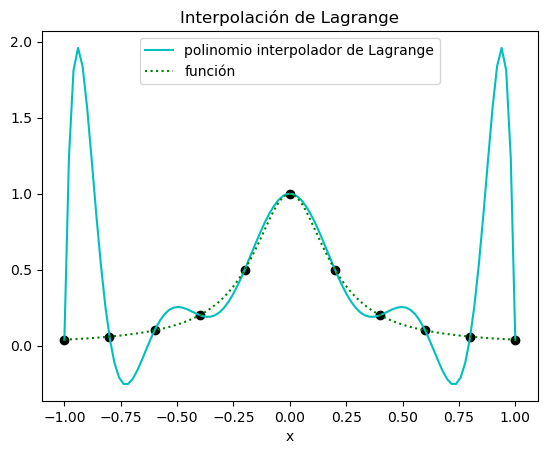

In [153]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función de runge
_, fig_runge_11, tiempo_ejecucion_runge_11, error_runge_11 = F.inter_lagrange(const.nodos_runge_11,
                                                                         F.runge_vec,
                                                                         const.abscisas_runge)
print('La interpolación baricéntrica para la función de Runge, con once nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_runge_11) +' y un error de ' + str(error_runge_11) + ' aproximadamente.\nSu plot es: ')
fig_runge_11

La interpolación baricéntrica para la función de Runge, con veintiun nodos equespaciados tiene un tiempo de ejecución de 
0.016150600000401028 segundos y un error de 117.34002760408885 aproximadamente.
Su plot es: 


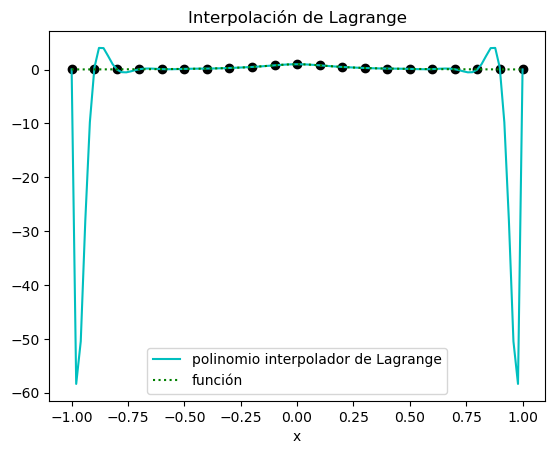

In [154]:
# Polinomio interpolador que se obtiene con 21 nodos equiespaciados en la función de runge
_, fig_runge_21, tiempo_ejecucion_runge_21, error_runge_21 = F.inter_lagrange(const.nodos_runge_21,
                                                                         F.runge_vec,
                                                                         const.abscisas_runge)
print('La interpolación baricéntrica para la función de Runge, con veintiun nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_runge_21) +' y un error de ' + str(error_runge_21) + ' aproximadamente.\nSu plot es: ')
fig_runge_21

La interpolación baricéntrica para la función de Runge, con once nodos de Chebysev tiene un tiempo de ejecución de 
0.005076500000541273 segundos y un error de 0.5684435206780134 aproximadamente.
Su plot es: 


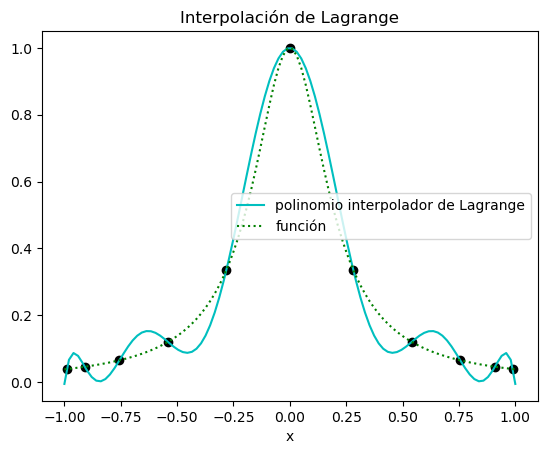

In [155]:
# Polinomio interpolador que se obtiene con 11 nodos de Chebysev en la función de runge
_, fig_cheby_runge_11, tiempo_ejecucion_cheby_runge_11, error_cheby_runge_11 = F.inter_lagrange(const.nodos_cheby_runge_11,
                                                                                           F.runge_vec,
                                                                                           const.abscisas_runge)
print('La interpolación baricéntrica para la función de Runge, con once nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_runge_11) +' y un error de ' + str(error_cheby_runge_11) + ' aproximadamente.\nSu plot es: ')
fig_cheby_runge_11


La interpolación baricéntrica para la función de Runge, con ventiun nodos de Chebysev tiene un tiempo de ejecución de 
0.01567460000023857 segundos y un error de 0.07496227144829992 aproximadamente.
Su plot es: 


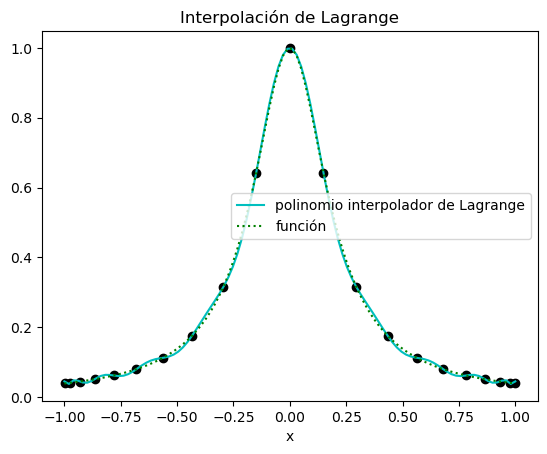

In [156]:
# Polinomio interpolador que se obtiene con 11 nodos de Chebysev en la función de runge
_, fig_cheby_runge_21, tiempo_ejecucion_cheby_runge_21, error_cheby_runge_21 = F.inter_lagrange(const.nodos_cheby_runge_21,
                                                                                           F.runge_vec,
                                                                                           const.abscisas_runge)
print('La interpolación baricéntrica para la función de Runge, con ventiun nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_runge_21) +' y un error de ' + str(error_cheby_runge_21) + ' aproximadamente.\nSu plot es: ')
fig_cheby_runge_21

La interpolación baricéntrica para la función de Gauss, con once nodos equespaciados tiene un tiempo de ejecución de 
0.0043566999993345235 segundos y un error de 4.8409699157865305 aproximadamente.
Su plot es: 


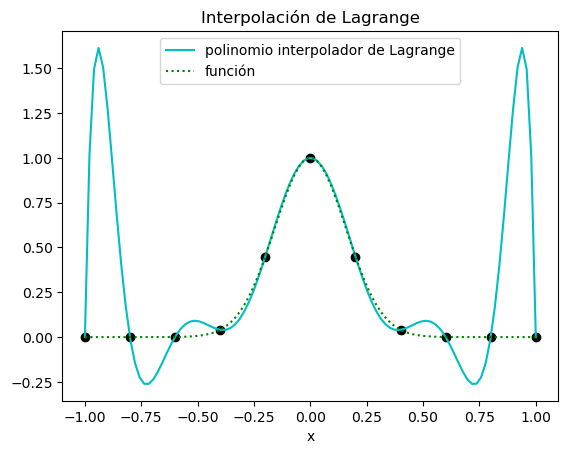

In [157]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función exponencial
_, fig_exp_11, tiempo_ejecucion_exp_11, error_exp_11 = F.inter_lagrange(const.nodos_gauss_11,
                                                                         F.exp_vec,
                                                                         const.abscisas_gauss)
print('La interpolación baricéntrica para la función de Gauss, con once nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_exp_11) +' y un error de ' + str(error_exp_11) + ' aproximadamente.\nSu plot es: ')
fig_exp_11

La interpolación baricéntrica para la función de Gauss, con veitiun nodos equespaciados tiene un tiempo de ejecución de 
0.015568599999824073 segundos y un error de 3.8459407491538666 aproximadamente.
Su plot es: 


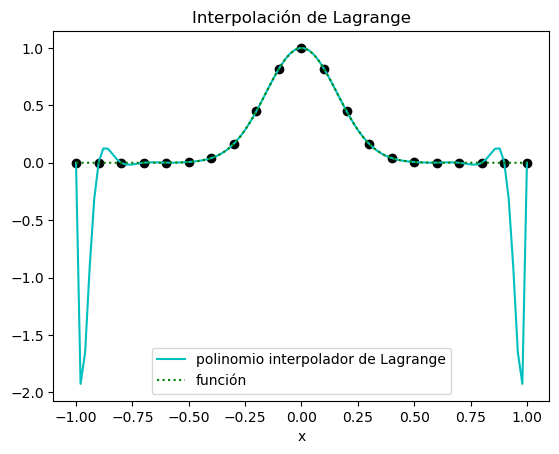

In [158]:
# Polinomio interpolador que se obtiene con 21 nodos equiespaciados en la función exponencial
_, fig_exp_21, tiempo_ejecucion_exp_21, error_exp_21 = F.inter_lagrange(const.nodos_gauss_21,
                                                                         F.exp_vec,
                                                                         const.abscisas_gauss)
print('La interpolación baricéntrica para la función de Gauss, con veitiun nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_exp_21) +' y un error de ' + str(error_exp_21) + ' aproximadamente.\nSu plot es: ')
fig_exp_21

La interpolación baricéntrica para la función de Gauss, con once nodos de Chebysev tiene un tiempo de ejecución de 
0.004662899999857473 segundos y un error de 0.504544158520987 aproximadamente.
Su plot es: 


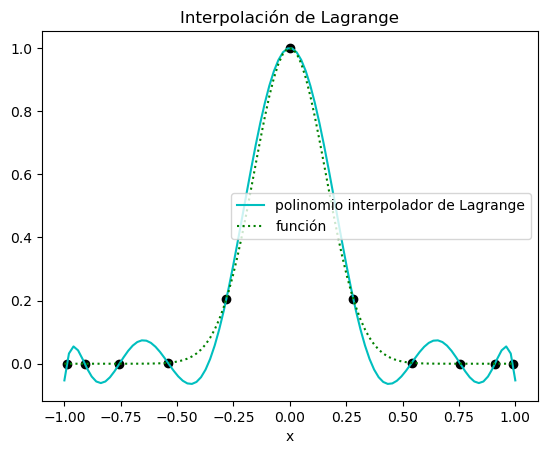

In [159]:
# Polinomio interpolador que se obtiene con 11 nodos de Chebysev en la función exponencial
_, fig_cheby_exp_11, tiempo_ejecucion_cheby_exp_11, error_cheby_exp_11 = F.inter_lagrange(const.nodos_cheby_gauss_11,
                                                                                          F.exp_vec,
                                                                                          const.abscisas_gauss)
print('La interpolación baricéntrica para la función de Gauss, con once nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_exp_11) +' y un error de ' + str(error_cheby_exp_11) + ' aproximadamente.\nSu plot es: ')
fig_cheby_exp_11

La interpolación baricéntrica para la función de Gauss, con veitiun nodos de Chebysev tiene un tiempo de ejecución de 
0.015842800000427815 segundos y un error de 0.008257997582501 aproximadamente.
Su plot es: 


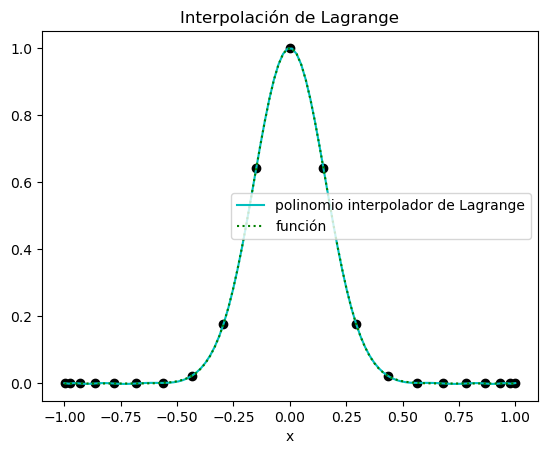

In [160]:
# Polinomio interpolador que se obtiene con 21 nodos de Chebysev en la función exponencial
_, fig_cheby_exp_21, tiempo_ejecucion_cheby_exp_21, error_cheby_exp_21 = F.inter_lagrange(const.nodos_cheby_gauss_21,
                                                                                            F.exp_vec,
                                                                                            const.abscisas_gauss)
print('La interpolación baricéntrica para la función de Gauss, con veitiun nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_exp_21) +' y un error de ' + str(error_cheby_exp_21) + ' aproximadamente.\nSu plot es: ')
fig_cheby_exp_21

En este caso, las conclusiones son muy similares al caso de la interpolación baricéntrica. 


# Tarea 1-Interpolación polinómica: Interpolación por diferencias divididas
Hemos definido una función llamada **inter_dd** que nos permite hacer la interpolación por diferencias divididas.

In [161]:
help(F.diferencias_divididas)

Help on function diferencias_divididas in module funciones_auxiliares:

diferencias_divididas(xi, yi)
    Funcion que crea las diferencias divididas y devuelve el polinomio de Newton, junto a una funcion ejecutable.
    
    Args:
        xi: Array de las equis
        yi: Array de los valores
    
    Returns:
        matriz: Devuelve una matriz con las diferencias divididas.
        pol: Devuelve el polinomio de Newton simbolico. Para verlo, se ha de usar pprint.
        pol_numpy: Funcion llamable y ejecutable para obtener valores.



In [162]:
help(F.inter_dd)

Help on function inter_dd in module funciones_auxiliares:

inter_dd(nodos, funcion, intervalo)
    Esta función hace la interpolación mediante diferencias divididas, crea su plot y calcula el error y tiempo
    que se tarda en hacer la interpolación. Esta funcion se utiliza pues sigue el esquema de las anteriores, pero el codigo
    importante es el de diferencias_divididas(xi,yi)
    
    Args:
        nodos : Lista de nodos para interpolar 
        funcion :  Funcion que se quiere interpolar.
        intervalo : Lista de puntos donde se evaluará el polinomio baricentrico tras ser calculado
        
    Returns:
        pol: Devuelve el polinomio de Newton simbolico. Para verlo, se ha de usar pprint.
        pol_numpy: Funcion llamable y ejecutable para obtener valores.
        matriz: Devuelve una matriz con las diferencias divididas.
        fig: Devuelve el plot.
        tiempo_ejecucion: Tiempo que tarda en ejecutarse la interpolacion
        error: Error de la interpolacion respe

Su polinomio asociado es: 

2.25910135050456e-6⋅x⋅(x - 1.88495559215388)⋅(x - 1.25663706143592)⋅(x - 0.628
318530717959)⋅(x + 0.628318530717959)⋅(x + 1.25663706143592)⋅(x + 1.8849555921
5388)⋅(x + 2.51327412287183)⋅(x + 3.14159265358979) - 1.27749171716278e-5⋅x⋅(x
 - 1.25663706143592)⋅(x - 0.628318530717959)⋅(x + 0.628318530717959)⋅(x + 1.25
663706143592)⋅(x + 1.88495559215388)⋅(x + 2.51327412287183)⋅(x + 3.14159265358
979) - 0.000103900009817306⋅x⋅(x - 0.628318530717959)⋅(x + 0.628318530717959)⋅
(x + 1.25663706143592)⋅(x + 1.88495559215388)⋅(x + 2.51327412287183)⋅(x + 3.14
159265358979) + 0.00119637898951893⋅x⋅(x + 0.628318530717959)⋅(x + 1.256637061
43592)⋅(x + 1.88495559215388)⋅(x + 2.51327412287183)⋅(x + 3.14159265358979) - 
0.935489283788639⋅x + 6.84702743926174e-17⋅(x + 0.628318530717959)⋅(x + 1.2566
3706143592)⋅(x + 1.88495559215388)⋅(x + 2.51327412287183)⋅(x + 3.1415926535897
9) - 0.0370958263066888⋅(x + 1.25663706143592)⋅(x + 1.88495559215388)⋅(x + 2.5
1327412287183)⋅(x + 3.14

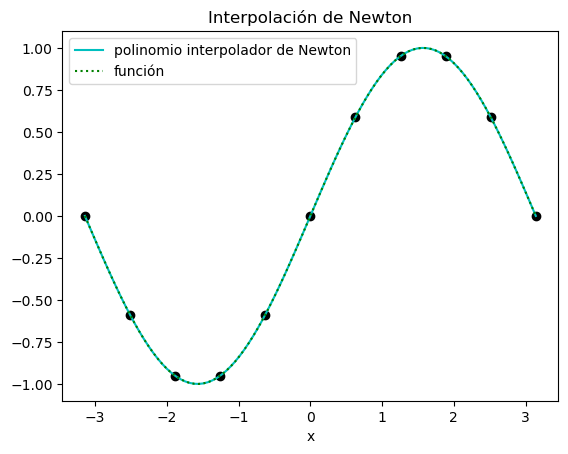

In [163]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función seno
pol, _, _, fig_sin_11, tiempo_ejecucion_sin_11, error_sin_11 = F.inter_dd(const.nodos_sin_11,
                                                                            F.sin_vec,
                                                                            const.abscisas_sin)
print('Su polinomio asociado es: \n')
pprint(pol)                                                                           
print('\n \nLa interpolación de Newton para el seno, con once nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_sin_11) +' y un error de ' + str(error_sin_11) + ' aproximadamente.\nSu plot es: ')
fig_sin_11
 



 
La interpolación de Newton para el seno, con veintiun nodos equespaciados tiene un tiempo de ejecución de 
0.07219199999963166 segundos y un error de 2.9308936357940673e-13 aproximadamente.
Su plot es: 


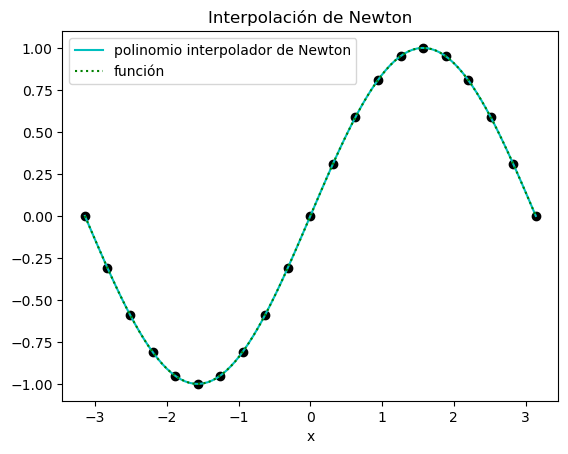

In [164]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función seno
_, _, _, fig_sin_21, tiempo_ejecucion_sin_21, error_sin_21 = F.inter_dd(const.nodos_sin_21,
                                                                            F.sin_vec,
                                                                            const.abscisas_sin)                                                                        
print('\n \nLa interpolación de Newton para el seno, con veintiun nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_sin_21) +' y un error de ' + str(error_sin_21) + ' aproximadamente.\nSu plot es: ')
fig_sin_21

La interpolación de Newton para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de 
0.024734300000091025 segundos y un error de 4.223704262829912e-05 aproximadamente. 
Su plot es: 


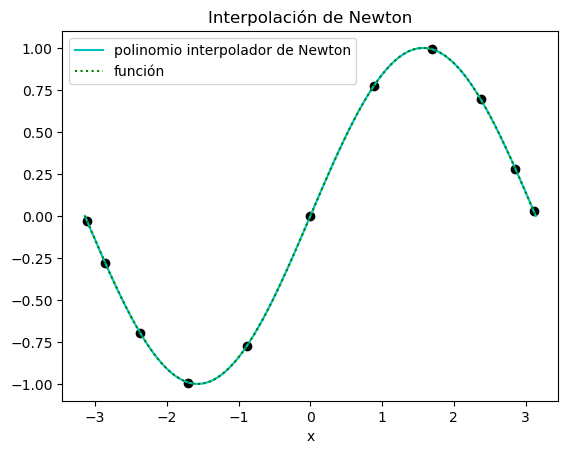

In [165]:
# Polinomio interpolador que se obtiene con 11 nodos de Chebyshev en la función seno
_, _, _, fig_cheby_sin_11, tiempo_ejecucion_cheby_sin_11, error_cheby_sin_11 = F.inter_dd(const.nodos_cheby_sin_11,
                                                                                            F.sin_vec,
                                                                                            const.abscisas_sin)
print('La interpolación de Newton para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_sin_11) +' y un error de ' + str(error_cheby_sin_11) + ' aproximadamente. \nSu plot es: ')
fig_cheby_sin_11

La interpolación de Newton para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de 
0.08933460000025661 segundos y un error de 2.634924208559321e-13 aproximadamente. 
Su plot es: 


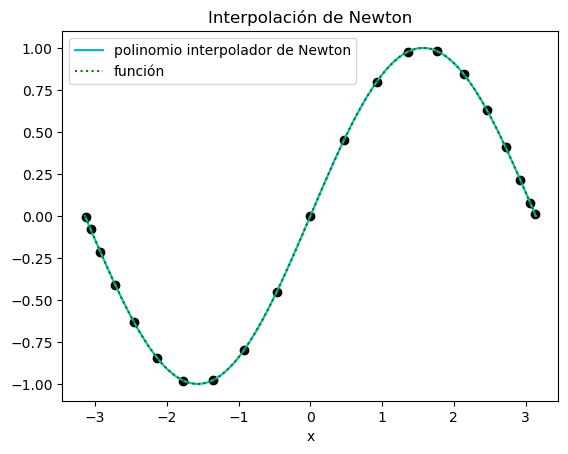

In [166]:
# Polinomio interpolador que se obtiene con 21 nodos de Chebysheven la función seno
_, _, _, fig_cheby_sin_21, tiempo_ejecucion_cheby_sin_21, error_cheby_sin_21 = F.inter_dd(const.nodos_cheby_sin_21,
                                                                                            F.sin_vec,
                                                                                            const.abscisas_sin)
print('La interpolación de Newton para el seno, con veintiun nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_sin_21) +' y un error de ' + str(error_cheby_sin_21) + ' aproximadamente. \nSu plot es: ')
fig_cheby_sin_21

Tras aplicar la interpolación de Newton en la función seno pueden extraerse las siguientes conclusiones:
* Usando los nodos equiespaciados (11 nodos), se obtiene un error del orden $10^{-3}$ sin embargo, si aumentamos los nodos (21 nodos), logramos disminuir el error hasta un orden de $10^{-13}$, aunque, el tiempo de ejecución se triplica.
* Por otro lado, empleando las raíces de Chebyshev como nodos en lugar de equiespaciarlos, se consigue una mayor precisión en ambas cantidades de nodos.
* Aunque por otro lado es cierto que para la función seno cualquiera de las opciones tal y como se observa en las gráficas proporciona unos resultados muy acertados.

Su polinomio asociado es: 

-220.941742081448⋅x⋅(x - 0.8)⋅(x - 0.6)⋅(x - 0.4)⋅(x - 0.2)⋅(x + 0.2)⋅(x + 0.4
)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 220.941742081448⋅x⋅(x - 0.6)⋅(x - 0.4)⋅(x - 
0.2)⋅(x + 0.2)⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) - 167.9157239819⋅x⋅(x -
 0.4)⋅(x - 0.2)⋅(x + 0.2)⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 84.8416289
592759⋅x⋅(x - 0.2)⋅(x + 0.2)⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) - 17.6753
393665158⋅x⋅(x + 0.2)⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 0.101809954751
131⋅x - 6.36312217194571⋅(x + 0.2)⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 2
.68665158371041⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 0.791855203619909⋅(x
 + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 0.260180995475113⋅(x + 0.8)⋅(x + 1.0) + 0.140271
49321267

 
 La interpolación de Newton para la función de Runge, con once nodos equespaciados tiene un tiempo de ejecución de 
0.022646999999778927 segundos y un error de 5.772723863677903 aproximadamente.
Su plot es: 


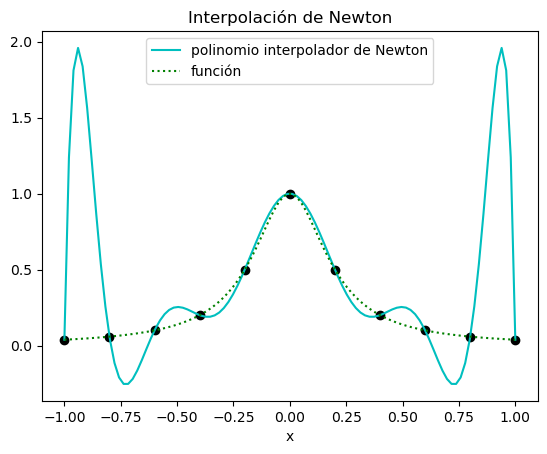

In [167]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función de runge
pol, _, _, fig_runge_11, tiempo_ejecucion_runge_11, error_runge_11 = F.inter_dd(const.nodos_runge_11,
                                                                         F.runge_vec,
                                                                         const.abscisas_runge)
print('Su polinomio asociado es: \n')
pprint(pol)  
print('\n \n La interpolación de Newton para la función de Runge, con once nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_runge_11) +' y un error de ' + str(error_runge_11) + ' aproximadamente.\nSu plot es: ')
fig_runge_11

La interpolación  de Newton para la función de Runge, con veintiun nodos equespaciados tiene un tiempo de ejecución de 
0.08201639999970212 segundos y un error de 117.34002424707452 aproximadamente.
Su plot es: 


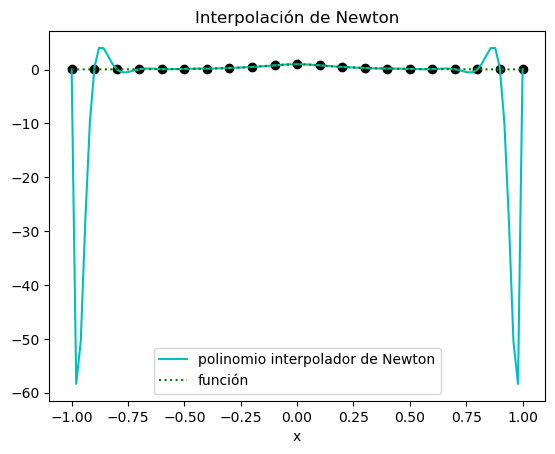

In [168]:

# Polinomio interpolador que se obtiene con 21 nodos equiespaciados en la función de runge
_, _, _, fig_runge_21, tiempo_ejecucion_runge_21, error_runge_21 = F.inter_dd(const.nodos_runge_21,
                                                                         F.runge_vec,
                                                                         const.abscisas_runge)
print('La interpolación  de Newton para la función de Runge, con veintiun nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_runge_21) +' y un error de ' + str(error_runge_21) + ' aproximadamente.\nSu plot es: ')
fig_runge_21

La interpolación de Newton para la función de Runge, con once nodos de Chebysev tiene un tiempo de ejecución de 
0.023758299999826704 segundos y un error de 0.568443520677998 aproximadamente.
Su plot es: 


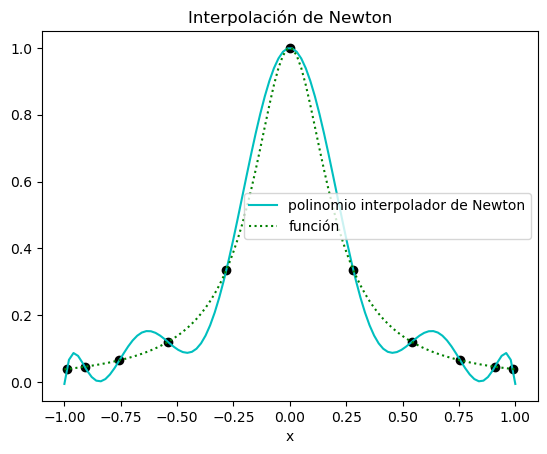

In [169]:
# Polinomio interpolador que se obtiene con 11 nodos de Chebysev en la función de runge
_, _, _, fig_cheby_runge_11, tiempo_ejecucion_cheby_runge_11, error_cheby_runge_11 = F.inter_dd(const.nodos_cheby_runge_11,
                                                                                           F.runge_vec,
                                                                                           const.abscisas_runge)
print('La interpolación de Newton para la función de Runge, con once nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_runge_11) +' y un error de ' + str(error_cheby_runge_11) + ' aproximadamente.\nSu plot es: ')
fig_cheby_runge_11

La interpolación de Newton para el seno, con once veintiun nodos de Chebysev tiene un tiempo de ejecución de 
0.09245430000009947 segundos y un error de 0.07496227436810761 aproximadamente.
Su plot es: 


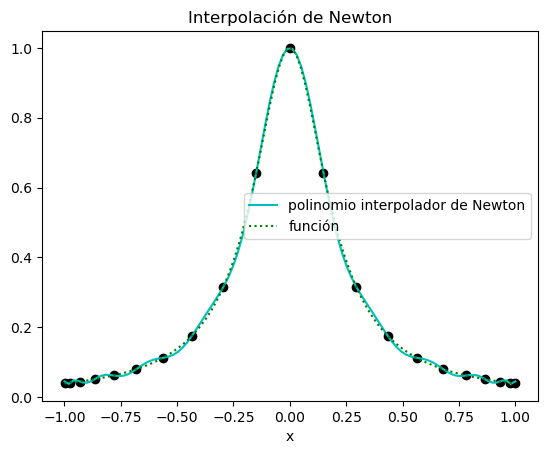

In [170]:
# Polinomio interpolador que se obtiene con 21 nodos de Chebysev en la función de runge
_, _, _, fig_cheby_runge_21, tiempo_ejecucion_cheby_runge_21, error_cheby_runge_21 = F.inter_dd(const.nodos_cheby_runge_21,
                                                                                           F.runge_vec,
                                                                                           const.abscisas_runge)
print('La interpolación de Newton para el seno, con once veintiun nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_runge_21) +' y un error de ' + str(error_cheby_runge_21) + ' aproximadamente.\nSu plot es: ')
fig_cheby_runge_21

Tras aplicar la interpolación de Newton en la función de Runge pueden extraerse las siguientes conclusiones:
* Usando los nodos equiespaciados se obtienen unos resultados bastante peores que en la función seno, además, al contrario que en la anterior, al aumentar el número de nodos, aumentamos el error, alcanzando una cifra de $117$.
* Sin embargo, empleando las raíces de Chebyshev, el error es mucho menor y, aumentando los nodos se reduce el error, obteniéndose para 21 nodos $0.075$ .

Su polinomio asociado es: 

-196.447157855833⋅x⋅(x - 0.8)⋅(x - 0.6)⋅(x - 0.4)⋅(x - 0.2)⋅(x + 0.2)⋅(x + 0.4
)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 196.447157855833⋅x⋅(x - 0.6)⋅(x - 0.4)⋅(x - 
0.2)⋅(x + 0.2)⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) - 140.990374531136⋅x⋅(x
 - 0.4)⋅(x - 0.2)⋅(x + 0.2)⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 55.49299
15623266⋅x⋅(x - 0.2)⋅(x + 0.2)⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 8.359
40908983495⋅x⋅(x + 0.2)⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 1.3793557092
0738e-5⋅x - 22.0436155490757⋅(x + 0.2)⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0)
 + 7.57157869856464⋅(x + 0.4)⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 0.80272347520414
⋅(x + 0.6)⋅(x + 0.8)⋅(x + 1.0) + 0.00926332905482785⋅(x + 0.8)⋅(x + 1.0) + 1.3
7956182456962e-5

 
 La interpolación de Newton para la función de Gauss, con once nodos equespaciados tiene un tiempo de ejecución de 
0.022142199999507284 segundos y un error de 4.840969915787777 aproximadamente.
Su plot es: 


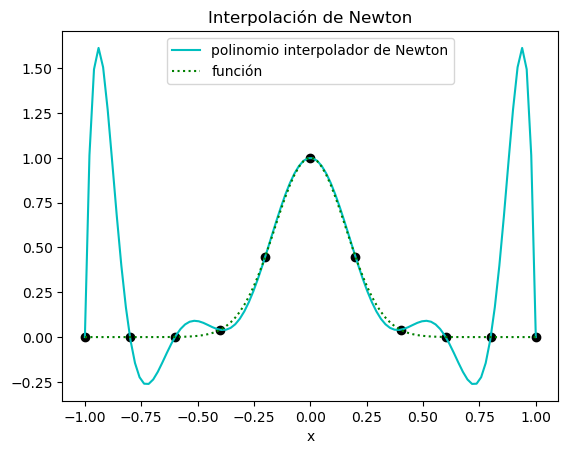

In [171]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función de gauss
pol, _, _, fig_exp_11, tiempo_ejecucion_exp_11, error_exp_11 = F.inter_dd(const.nodos_gauss_11,
                                                                         F.exp_vec,
                                                                         const.abscisas_gauss)
print('Su polinomio asociado es: \n')
pprint(pol)  
print('\n \n La interpolación de Newton para la función de Gauss, con once nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_exp_11) +' y un error de ' + str(error_exp_11) + ' aproximadamente.\nSu plot es: ')
fig_exp_11

La interpolación de Newton  para la función de Gauss, con veitiun nodos equespaciados tiene un tiempo de ejecución de 
0.09448479999991832 segundos y un error de 3.845940134217984 aproximadamente.
Su plot es: 


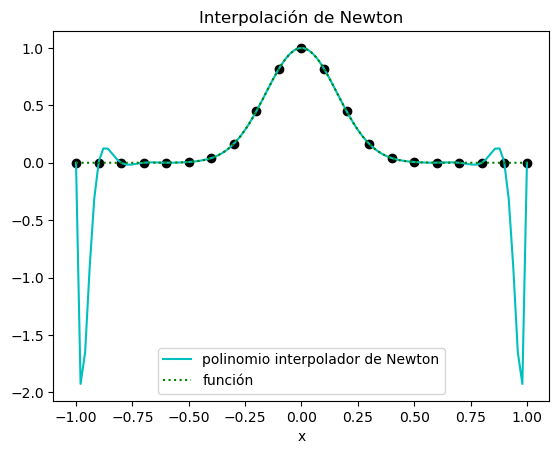

In [172]:
# Polinomio interpolador que se obtiene con 21 nodos equiespaciados en la función exponencial
_, _, _, fig_exp_21, tiempo_ejecucion_exp_21, error_exp_21 = F.inter_dd(const.nodos_gauss_21,
                                                                         F.exp_vec,
                                                                         const.abscisas_gauss)
print('La interpolación de Newton  para la función de Gauss, con veitiun nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_exp_21) +' y un error de ' + str(error_exp_21) + ' aproximadamente.\nSu plot es: ')
fig_exp_21

La interpolación de Newton para la función de Gauss, con once nodos de Chebysev tiene un tiempo de ejecución de 
0.028702900000098452 segundos y un error de 0.504544158521003 aproximadamente.
Su plot es: 


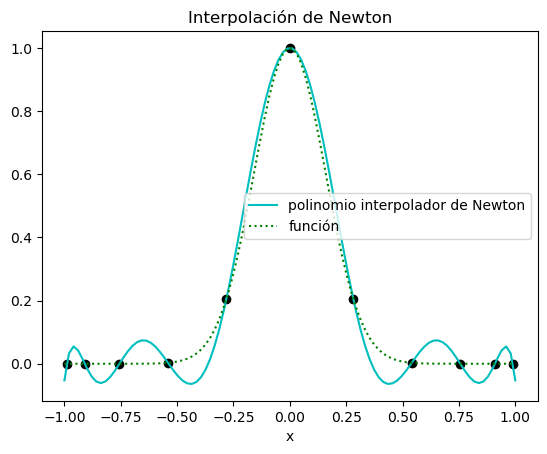

In [173]:
# Polinomio interpolador que se obtiene con 11 nodos de Chebysev en la función exponencial
_, _, _, fig_cheby_exp_11, tiempo_ejecucion_cheby_exp_11, error_cheby_exp_11 = F.inter_dd(const.nodos_cheby_gauss_11,
                                                                         F.exp_vec,
                                                                         const.abscisas_gauss)
print('La interpolación de Newton para la función de Gauss, con once nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_exp_11) +' y un error de ' + str(error_cheby_exp_11) + ' aproximadamente.\nSu plot es: ')
fig_cheby_exp_11

La interpolación de Newton para la función de Gauss, con veitiun nodos de Chebysev tiene un tiempo de ejecución de 
0.09920770000007906 segundos y un error de 0.008258013352337746 aproximadamente.
Su plot es: 


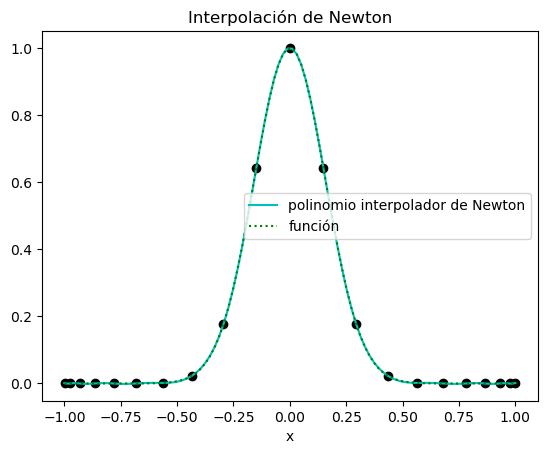

In [174]:
# Polinomio interpolador que se obtiene con 21 nodos de Chebysev en la función exponencial
_, _, _, fig_cheby_exp_21, tiempo_ejecucion_cheby_exp_21, error_cheby_exp_21 = F.inter_dd(const.nodos_cheby_gauss_21,
                                                                         F.exp_vec,
                                                                         const.abscisas_gauss)
print('La interpolación de Newton para la función de Gauss, con veitiun nodos de Chebysev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_exp_21) +' y un error de ' + str(error_cheby_exp_21) + ' aproximadamente.\nSu plot es: ')
fig_cheby_exp_21

Tras aplicar la interpolación de Newton en la función exponencial pueden extraerse las siguientes conclusiones:
* Empleando los nodos equiespaciados, obtenemos un error grande, aunque, en este caso vamos reduciéndolo aumentando el número de nodos, y, por ende, el coste computacional.
* Sin embargo, empleando las raíces de Chebyshev, el error es mucho menor y, aumentando los nodos se reduce también el error, obteniéndose para 21 nodos tal y como se observa en la gráfica una línea prácticamente igual a la de la función.

# Tarea 2: Splines cúbicos

A continuación se implementa y explica la interpolación basada en splines cúbicos. En primer lugar se muestra la función que calcula la interpolación dados los nodos de interpolación, la función a interpolar y un intervalo en el que mostrar los gráficos.

La interpolación mediante Splines Cúbicos para la función de Seno, con once nodos equiespaciados tiene un tiempo de ejecución de 
7.750000077066943e-05 segundos y un error de 0.009027003473026877 aproximadamente.
Su plot es: 


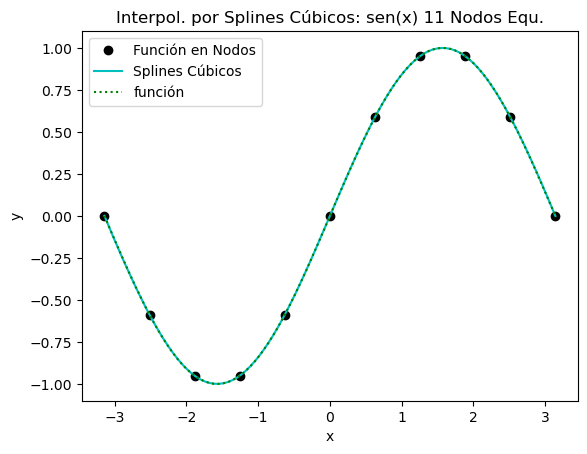

In [197]:
# Función seno y 11 nodos equidistantes entre -pi y pi
pol, fig_sin_11, tiempo_ejecucion_sin_11, error_sin_11 = F.inter_splines(const.nodos_sin_11,
                                                                         F.sin_vec, 
                                                                         const.abscisas_sin,
                                                                         'sen(x) 11 Nodos Equ.')
print('La interpolación mediante Splines Cúbicos para la función de Seno, con once nodos equiespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_sin_11) +' y un error de ' + str(error_sin_11) + ' aproximadamente.\nSu plot es: ')
fig_sin_11

La interpolación mediante Splines Cúbicos para la función de Seno, con veintiun nodos equespaciados tiene un tiempo de ejecución de 
9.299999874201603e-05 segundos y un error de 0.0002358954232958513 aproximadamente. 
Su plot es: 


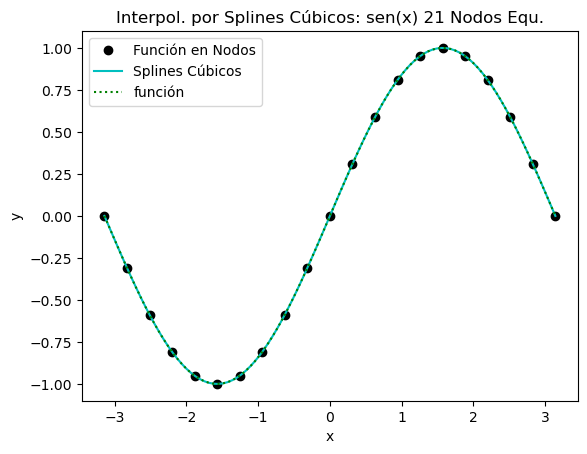

In [199]:
#función seno y 21 nodos equidistantes entre -pi y pi
_, fig_sin_21, tiempo_ejecucion_sin_21, error_sin_21 = F.inter_splines(const.nodos_sin_21,
                                                                            F.sin_vec,
                                                                            const.abscisas_sin,
                                                                           'sen(x) 21 Nodos Equ.')
print('La interpolación mediante Splines Cúbicos para la función de Seno, con veintiun nodos equespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_sin_21) +' y un error de ' + str(error_sin_21) + ' aproximadamente. \nSu plot es: ')
fig_sin_21

La interpolación mediante Splines Cúbicos para la función de Seno, con once nodos de Chebyshev tiene un tiempo de ejecución de 
8.189999789465219e-05 segundos y un error de 0.005999871912911934 aproximadamente. 
Su plot es: 


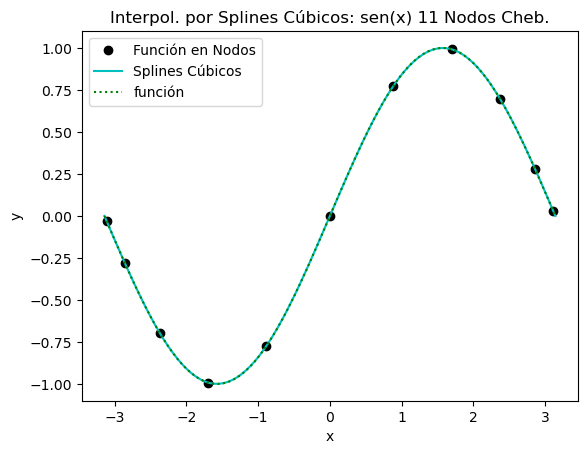

In [201]:
# función seno con 11 nodos de Chebyshev entre -pi y pi
_, fig_cheby_sin_11, tiempo_ejecucion_cheby_sin_11, error_cheby_sin_11 = F.inter_splines(const.nodos_cheby_sin_11,
                                                                            F.sin_vec,
                                                                            const.abscisas_sin,
                                                                           'sen(x) 11 Nodos Cheb.')
print('La interpolación mediante Splines Cúbicos para la función de Seno, con once nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_sin_11) +' y un error de ' + str(error_cheby_sin_11) + ' aproximadamente. \nSu plot es: ')
fig_cheby_sin_11

La interpolación mediante Splines Cúbicos para la función de Seno, con once nodos de Chebyshev tiene un tiempo de ejecución de 
7.990000085555948e-05 segundos y un error de 0.0003697396101931242 aproximadamente. 
Su plot es: 


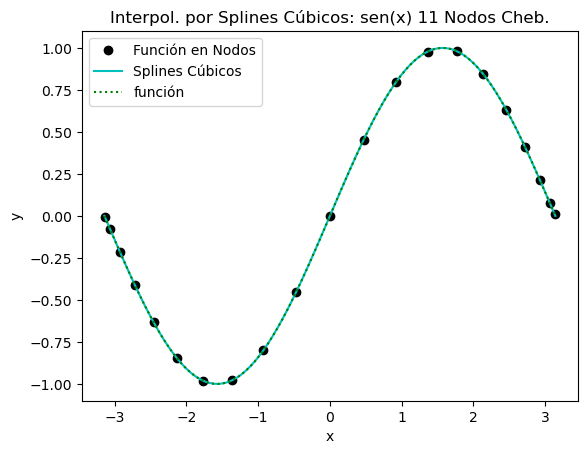

In [202]:
# función seno con 21 nodos de Chebyshev entre -pi y pi
_, fig_cheby_sin_21, tiempo_ejecucion_cheby_sin_21, error_cheby_sin_21 = F.inter_splines(const.nodos_cheby_sin_21,
                                                                            F.sin_vec,
                                                                            const.abscisas_sin,
                                                                           'sen(x) 11 Nodos Cheb.')
print('La interpolación mediante Splines Cúbicos para la función de Seno, con once nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_sin_21) +' y un error de ' + str(error_cheby_sin_21) + ' aproximadamente. \nSu plot es: ')
fig_cheby_sin_21

### Conclusiones función seno
Las gráficas muestran que la función seno se aproxima  bastante bien en todos los casos con los splines cúbicos, sin  mostrar ninguna oscilación.

Vemos que, tanto para los nodos equiespaciados como para los nodos de Chebyshev, el error es menor para 21 puntos que para 11. Comparando los nodos equiespaciados con Chebyshev, vemos que el error es similar, con 21 puntos el error es menor para los puntos equiespaciados, pero para 11 puntos es menor con nodos Chebyshev. En todo caso no hay una ganancia clara de ninguna de las dos opciones (equiespaciados vs Chebyshev), probablemente porque la función seno no tiene grandes picos en el centro del intervalo ni en los bordes del mismo sino que está uniformemente distribuida en y.

En cuanto a los tiempos de ejecución vemos que son bastante bajos (menos de 1 ms), y aunque deberian ser inferiores para 11 nodos que para 21 (dado que se tienen que hacer menos cálculos), en ocasiones se obtiene que la duración es menor para 21 nodos que para 11. Esto se produce probablemente a que la duración medida depende de la carga del procesador en el instante de ejecución. Suponemos que si hubiese mucha más diferencia en el número de nodos se podría ver una tendencia más clara, pero de 11 a 21 no se nota.

La interpolación mediante Splines Cúbicos para la función de Runge, con once nodos equiespaciados tiene un tiempo de ejecución de 
8.24999988253694e-05 segundos y un error de 0.07140021086674511 aproximadamente.
Su plot es: 


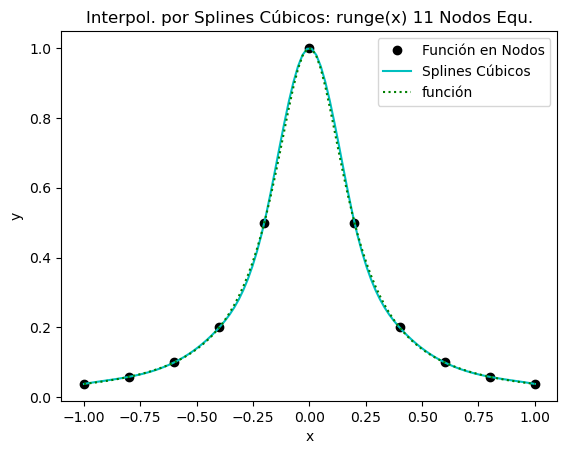

In [204]:
# Función de runge y 11 nodos equidistantes entre -1 y 1
_, fig_runge_11, tiempo_ejecucion_runge_11, error_runge_11 = F.inter_splines(const.nodos_runge_11,
                                                                         F.runge_vec, 
                                                                         const.abscisas_runge,
                                                                         'runge(x) 11 Nodos Equ.')
print('La interpolación mediante Splines Cúbicos para la función de Runge, con once nodos equiespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_runge_11) +' y un error de ' + str(error_runge_11) + ' aproximadamente.\nSu plot es: ')
fig_runge_11

La interpolación mediante Splines Cúbicos para la función de Runge, con veintiún nodos equiespaciados tiene un tiempo de ejecución de 
8.510000043315813e-05 segundos y un error de 0.008743323193602829 aproximadamente.
Su plot es: 


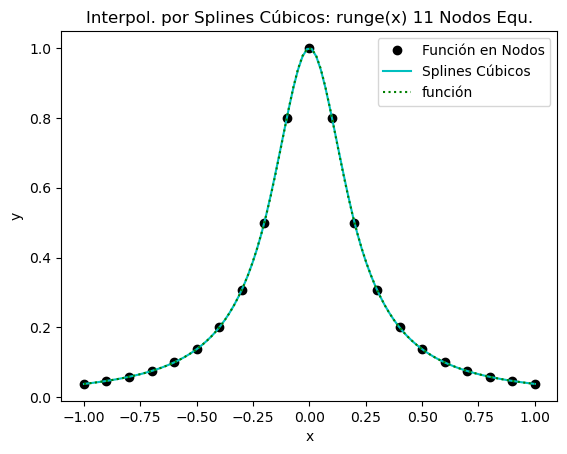

In [205]:
# Función de runge y 21 nodos equidistantes entre -1 y 1
_, fig_runge_21, tiempo_ejecucion_runge_21, error_runge_21 = F.inter_splines(const.nodos_runge_21,
                                                                         F.runge_vec, 
                                                                         const.abscisas_runge,
                                                                         'runge(x) 21 Nodos Equ.')
print('La interpolación mediante Splines Cúbicos para la función de Runge, con veintiún nodos equiespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_runge_21) +' y un error de ' + str(error_runge_21) + ' aproximadamente.\nSu plot es: ')
fig_runge_21

La interpolación mediante Splines Cúbicos para la función de Runge, con once nodos de Chebyshev tiene un tiempo de ejecución de 
8.189999789465219e-05 segundos y un error de 0.005999871912911934 aproximadamente. 
Su plot es: 


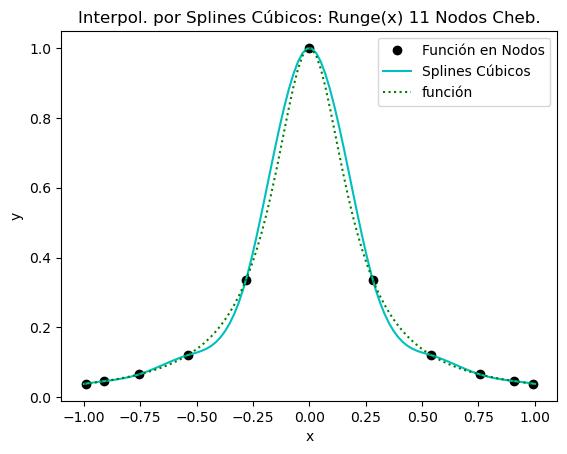

In [207]:
# Función runge  con 11 nodos de Chebyshev entre -1 y 1
_, fig_runge_11, tiempo_ejecucion_cheby_runge_11, error_cheby_runge_11 = F.inter_splines(const.nodos_cheby_runge_11,
                                                                            F.runge_vec,
                                                                            const.abscisas_runge,
                                                                           'Runge(x) 11 Nodos Cheb.')
print('La interpolación mediante Splines Cúbicos para la función de Runge, con once nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_sin_11) +' y un error de ' + str(error_cheby_sin_11) + ' aproximadamente. \nSu plot es: ')
fig_runge_11

La interpolación mediante Splines Cúbicos para la función de Runge, con veintún nodos de Chebyshev tiene un tiempo de ejecución de 
7.990000085555948e-05 segundos y un error de 0.0003697396101931242 aproximadamente. 
Su plot es: 


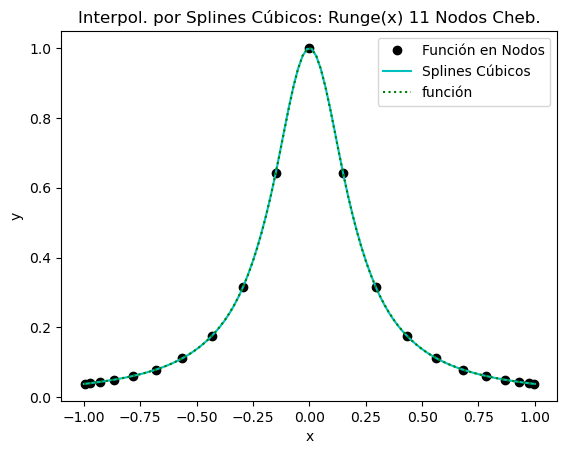

In [208]:
# Función runge  con 21 nodos de Chebyshev entre -1 y 1
_, fig_runge_21, tiempo_ejecucion_cheby_runge_11, error_cheby_runge_11 = F.inter_splines(const.nodos_cheby_runge_21,
                                                                            F.runge_vec,
                                                                            const.abscisas_runge,
                                                                           'Runge(x) 11 Nodos Cheb.')
print('La interpolación mediante Splines Cúbicos para la función de Runge, con veintún nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_cheby_sin_21) +' y un error de ' + str(error_cheby_sin_21) + ' aproximadamente. \nSu plot es: ')
fig_runge_21

### Conclusiones función de Runge
Por las gráficas se puede ver que la función de RUnge se aproxima muy bien con splines cúbicos, dado que no se presentan las oscilaciones (efecto Runge) que aparecen en otras interpolaciones. Aparentemente los splines cúbicos son la mejor opción para interpolar esta función.  

En cuanto a los errores, vemos que, tanto para los nodos equiespaciados como para los nodos de Chebyshev, el error es menor para 21 puntos que para 11. Comparando los nodos Chebyshev con los equiespaciados, parece que con un número de nodos bajo (11) Chebyshev es claramente peor con un error más elevado, sin embargo al subir los nodos a 21 los errores son similares, siendo incluso un poco más reducido en Chebyshev.

Respecto a los tiempos de ejecución, las conclusiones son similares que para la función seno. En general son bastante bajos en todos los casos (menos de 1 ms), y pueden cambiar bastante dependiendo del momento de ejecución. 

La interpolación mediante Splines Cúbicos para la función de Gauss, con once nodos equiespaciados tiene un tiempo de ejecución de 
0.00013590000162366778 segundos y un error de 0.06686923694822235 aproximadamente.
Su plot es: 


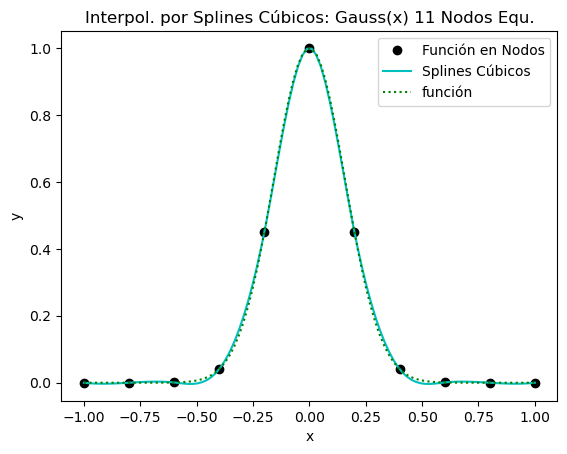

In [209]:
# Función de gauss y 11 nodos equidistantes entre -1 y 1
_, fig_exp_11, tiempo_ejecucion_exp_11, error_exp_11 = F.inter_splines(const.nodos_gauss_11,
                                                                         F.exp_vec, 
                                                                         const.abscisas_gauss,
                                                                         'Gauss(x) 11 Nodos Equ.')
print('La interpolación mediante Splines Cúbicos para la función de Gauss, con once nodos equiespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_exp_11) +' y un error de ' + str(error_exp_11) + ' aproximadamente.\nSu plot es: ')
fig_exp_11

In [ ]:
# Función de gauss y 21 nodos equidistantes entre -1 y 1
_, fig_exp_21, tiempo_ejecucion_exp_21, error_exp_21 = F.inter_splines(const.nodos_gauss_21,
                                                                         F.exp_vec, 
                                                                         const.abscisas_gauss,
                                                                         'Gauss(x) 11 Nodos Equ.')
print('La interpolación mediante Splines Cúbicos para la función de Gauss, con once nodos equiespaciados tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion_exp_21) +' y un error de ' + str(error_exp_21) + ' aproximadamente.\nSu plot es: ')
fig_exp_21

La interpolación mediante Splines Cúbicos para la función de Gauss, con once nodos de Chebyshev tiene un tiempo de ejecución de 
8.600000001024455e-05 segundos y un error de 0.11296536559518223 aproximadamente.
Su plot es: 


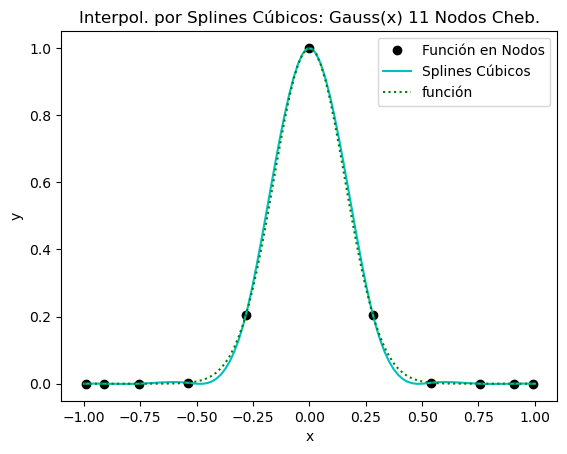

In [210]:
# Función de runge y 11 nodos equidistantes entre -1 y 1
_, fig_cheby_exp_11, tiempo_ejecucion__cheby_exp_11, error_cheby_exp_11 = F.inter_splines(const.nodos_cheby_gauss_11,
                                                                         F.exp_vec, 
                                                                         const.abscisas_gauss,
                                                                         'Gauss(x) 11 Nodos Cheb.')
print('La interpolación mediante Splines Cúbicos para la función de Gauss, con once nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion__cheby_exp_11) +' y un error de ' + str(error_cheby_exp_11) + ' aproximadamente.\nSu plot es: ')
fig_cheby_exp_11

La interpolación mediante Splines Cúbicos para la función de Gauss, con veintiún nodos de Chebyshev tiene un tiempo de ejecución de 
8.170000000973232e-05 segundos y un error de 0.02838334660763744 aproximadamente.
Su plot es: 


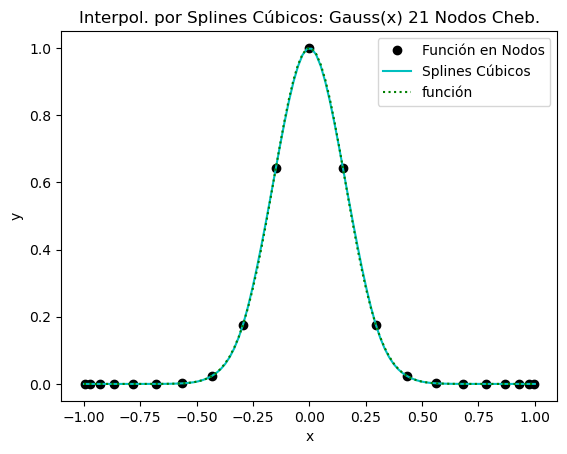

In [212]:
# Función de runge y 11 nodos equidistantes entre -1 y 1
_, fig_cheby_exp_21, tiempo_ejecucion__cheby_exp_21, error_cheby_exp_21 = F.inter_splines(const.nodos_cheby_gauss_21,
                                                                         F.exp_vec, 
                                                                         const.abscisas_gauss,
                                                                         'Gauss(x) 21 Nodos Cheb.')
print('La interpolación mediante Splines Cúbicos para la función de Gauss, con veintiún nodos de Chebyshev tiene un tiempo de ejecución de \n' +\
     str(tiempo_ejecucion__cheby_exp_21) +' y un error de ' + str(error_cheby_exp_21) + ' aproximadamente.\nSu plot es: ')
fig_cheby_exp_21

### Conclusiones función de Gauss
Viendo las gráficas, se puede llegar a una conclusión similar que con la función de Runge: la interpolación por splines cúbicos es muy similar a la función original, sin mostrar oscilaciones. Los  splines cúbicos parecen la mejor opción  para aproximar esta función.

En cuanto a los errores, vemos que tanto para los nodos equiespaciados como para los nodos de Chebyshev, el error es menor para 21 puntos que para 11. EN este  caso además se puede ver que la interpolación con nodos Chebyshev tiene más error que los nodos equiespaciados (p.ej. para 21 puntos, con nodos equiespaciados $0.004213129552233947$ y con Chebyshev: $0.02838334660763718$). Esto puede deberse a que los nodos Chebyshev se concentran más en los bordes del intervalo mientras que esta función tiene un pico concentrado en el centro  del intervalo, donde menos nodos hay, digamos que hay menos concentración de nodos donde la función  tiene valores distintos de 0. Con la función de Runge pasaba algo parecido y sin embargo el error con nodos Chebyshev era parecido a los nodos equiespaciados, ¿quizá porque los splines ajustan mejor la función de Runge que la exponencial?

Respecto a los tiempos de ejecución, las conclusiones son similares que para el resto de funciones. En general son bastante bajos en todos los casos (menos de 1 ms), y pueden cambiar bastante dependiendo del momento de ejecución. 